In [57]:
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from keras.preprocessing import image
from keras.models import Model

import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

(224, 224, 3)


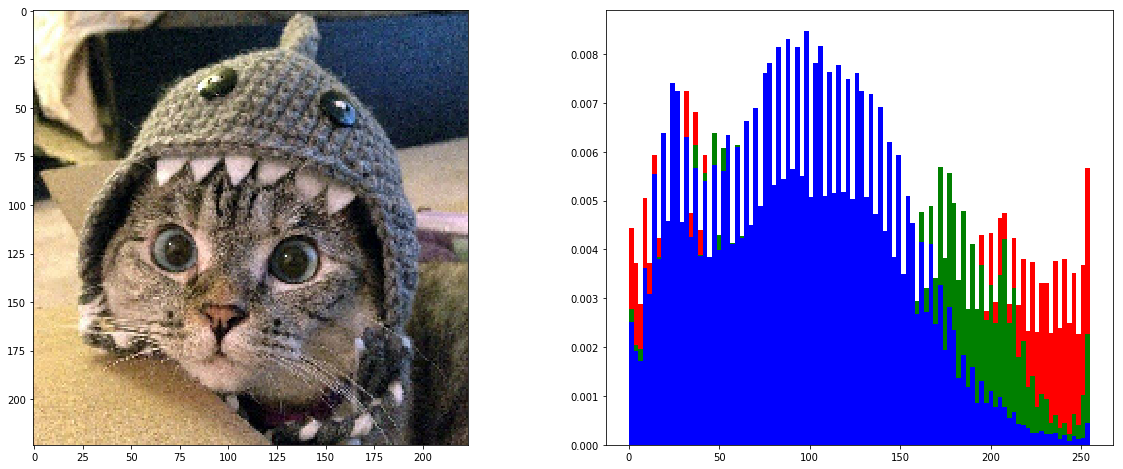

In [50]:
img_path = 'image.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # returns a PIL Image
img = image.img_to_array(img) # converts the pixel into a numpy array, with shape [224,224,3], with dtype=np.float32!


fig = plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow(img.astype(np.uint8))

plt.subplot(1,2,2)
plt.hist(img[:,:,0].flatten(), bins=100, normed=True, color='r')
plt.hist(img[:,:,1].flatten(), bins=100, normed=True, color='g')
plt.hist(img[:,:,2].flatten(), bins=100, normed=True, color='b')
print(img.shape)

In [51]:
# load a complete VGG166, trained on ImageNet dataset
vgg = keras.applications.VGG16(include_top=True, weights='imagenet')

In [52]:
# preprocess the image 

# create a batch of size 1 [N,H,W,C]
img_ = np.expand_dims(img, 0) 

# specific processing for VGG : RGB -> BGR, substract mean 'BGR', to float 32
img_ = preprocess_input(img_)

In [55]:
# apply the model to the pre-processed image : 
preds = vgg.predict(img_)

# print top 5 prediction 
pprint(decode_predictions(preds, top=5)[0])

[('n02123045', 'tabby', 0.24130654),
 ('n02124075', 'Egyptian_cat', 0.045333561),
 ('n02123159', 'tiger_cat', 0.044322364),
 ('n02808304', 'bath_towel', 0.040130001),
 ('n02490219', 'marmoset', 0.036623068)]


### Layers in a VGG16 : 

In [74]:
vgg_layers = [ layer.name for layer in vgg.layers]
print(vgg_layers)

['input_2', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions']


## Extract feature maps at `block3_pool`

In [62]:
# create a specific model that takes as input the input of vgg, and outputs the layer `block3_pool`
block3_pool_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_pool').output)

In [63]:
block3_pool_featres = block3_pool_extractor.predict(img_)
print(block3_pool_featres.shape)
# so we gate a numpy array, with 256 features maps, of size 28x28, for 1 element. 

(1, 28, 28, 256)


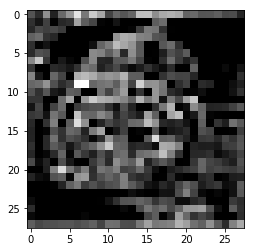

In [66]:
# plot the first feature as gray-level image 
plt.imshow(block3_pool_featres[0, :, :, 0], cmap='gray')

In [72]:
# this function will plot all the feature maps within a fig of size (20,20)
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(20, 20))
    for i in range(depth):
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
    plt.show()

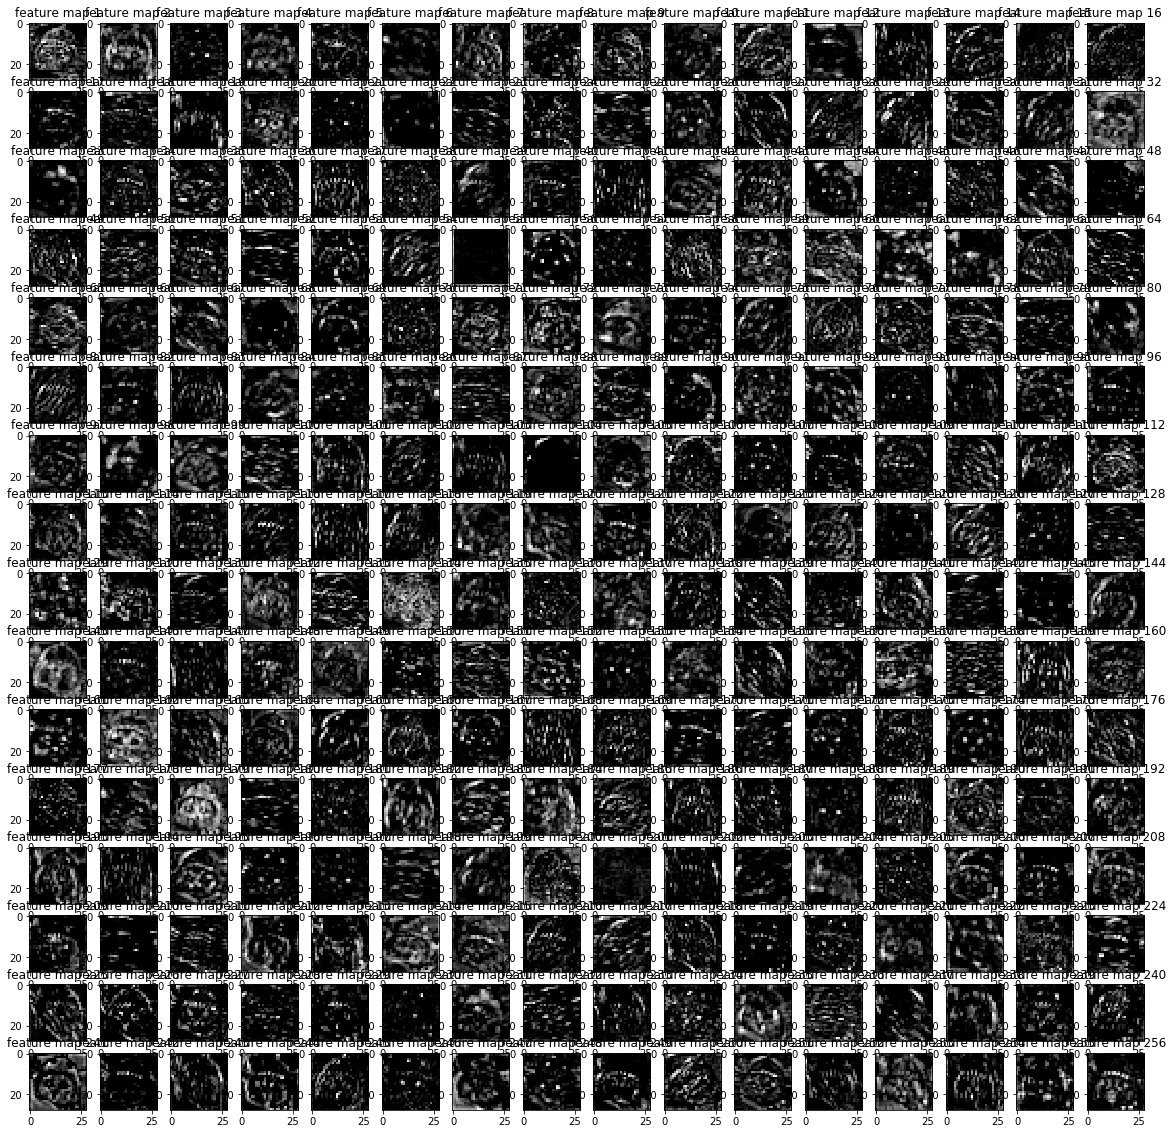

In [73]:
plot_feature_maps(block3_pool_featres[0])

## Apply to other layer in VGG 16 ? 

In [79]:
def plot_layer(layer_name):
    # check if the layer_name is correct 
    assert layer_name in vgg_layers
    
    features_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer(layer_name).output)
    feature_maps = features_extractor.predict(img_)[0]
    print("At layer \"{}\" : {} ".format(layer_name, feature_maps.shape))
    plot_feature_maps(feature_maps)

At layer "block1_conv2" : (224, 224, 64) 


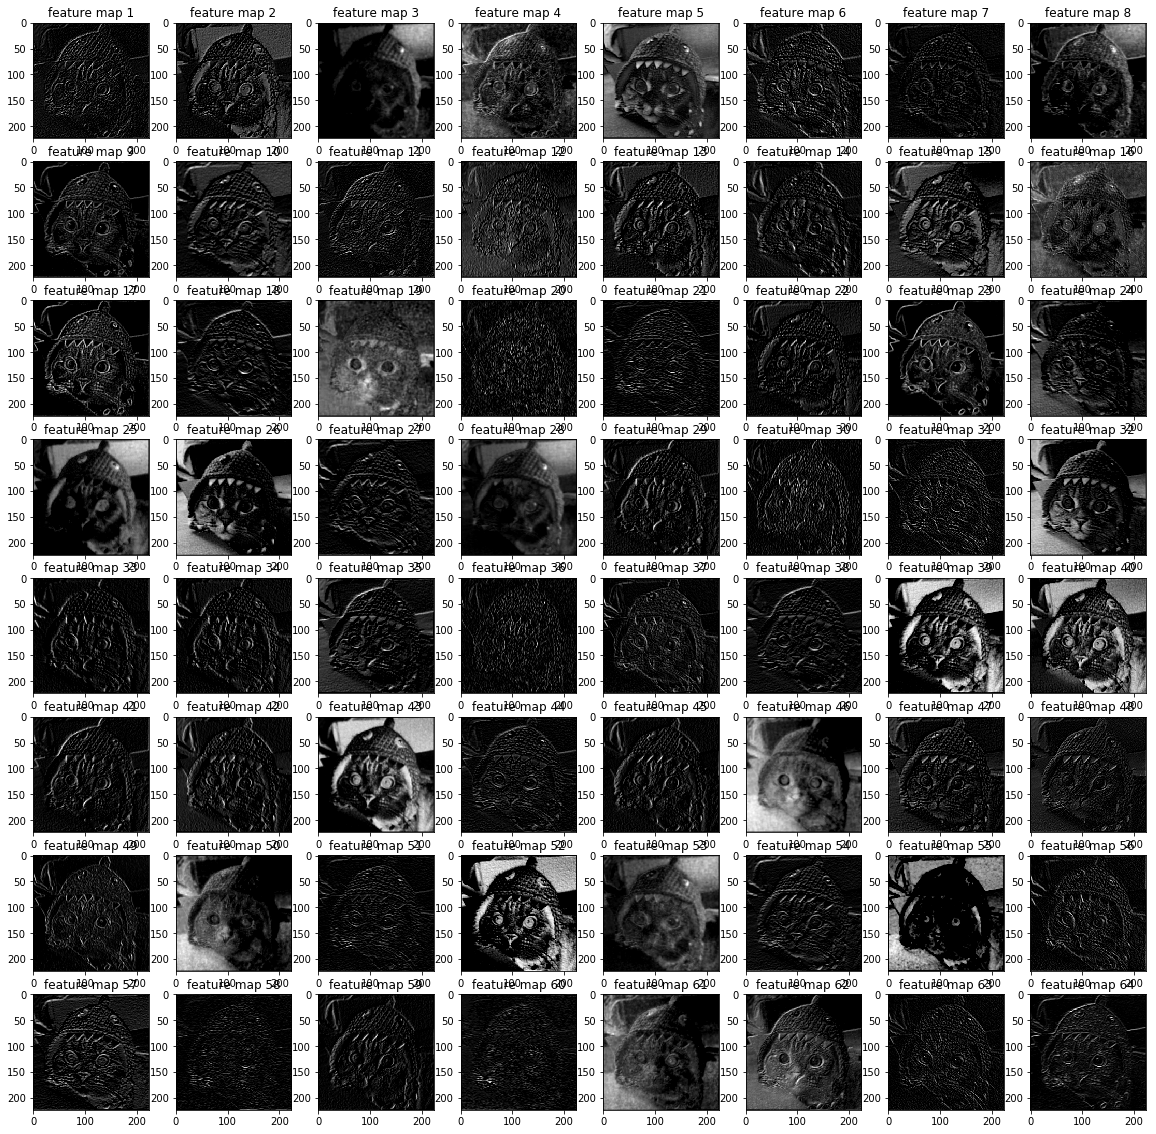

In [80]:
plot_layer('block1_conv2')

At layer "block3_conv2" : (56, 56, 256) 


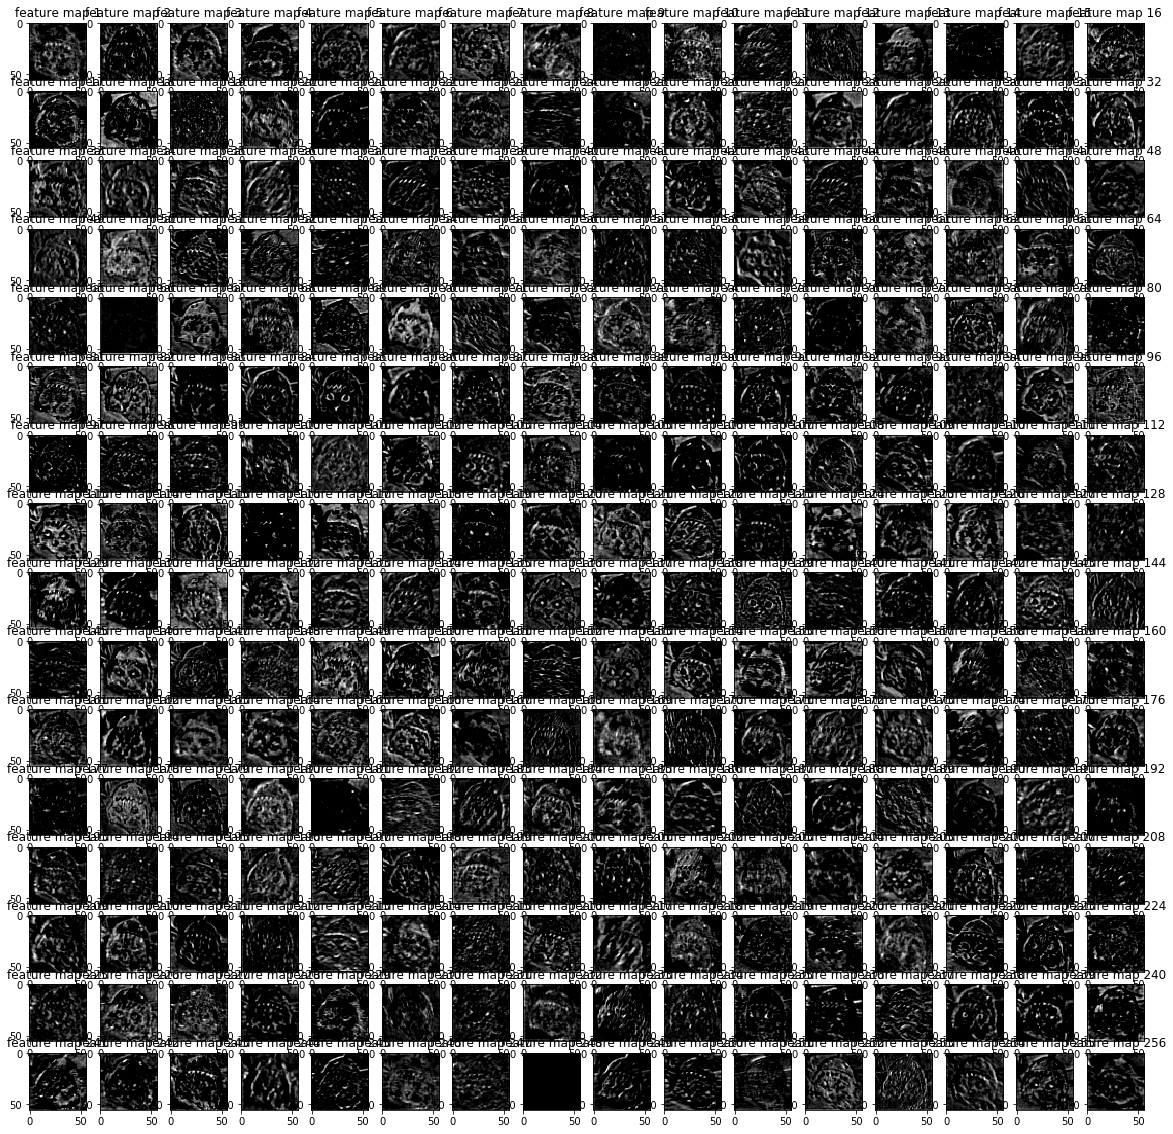

In [81]:
plot_layer('block3_conv2')